# Import Necessary Packages and Training Data

In [19]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [20]:
train_df1 = pd.read_csv('train-100-10.csv').iloc[:,:11]
train_df2 = pd.read_csv('train-100-100.csv')
train_df3 = pd.read_csv('train-1000-100.csv')
train_df4 = pd.read_csv('train-50(1000)-100.csv', index_col = 0)
train_df5 = pd.read_csv('train-100(1000)-100.csv', index_col = 0)
train_df6 = pd.read_csv('train-150(1000)-100.csv', index_col = 0)

# Functions

### Bits and pieces (Internal Work)

In [21]:
def cv_split_10(df):
    """Returns a list of 10 test and train datasets
    by taking in a Data Set"""
    dim = int(len(df)/10)
    
    cv1 = df.iloc[:dim,:]
    cv2 = df.iloc[dim:dim*2,:]
    cv3 = df.iloc[dim*2:dim*3,:]
    cv4 = df.iloc[dim*3:dim*4,:]
    cv5 = df.iloc[dim*4:dim*5,:]
    cv6 = df.iloc[dim*5:dim*6,:]
    cv7 = df.iloc[dim*6:dim*7,:]
    cv8 = df.iloc[dim*7:dim*8,:]
    cv9 = df.iloc[dim*8:dim*9,:]
    cv10 = df.iloc[dim*9:dim*10,:]
    
    list_cv = list([cv1, cv2, cv3, cv4, cv5, cv6, cv7, cv8, cv9, cv10])
    
    list_train = list()
    list_test = list()
    
    for i in range(0,10):
        df_test = list_cv[i]
        df_train = df[~df.isin(df_test)].dropna()
        
        list_train.append(df_train)
        list_test.append(df_test)
    
    return list_train, list_test 

In [22]:
def feature_target(df, col):
    
    df_f = df.iloc[:,:col] # feature
    df_t = df.iloc[:,col] # target
    
    return df_f, df_t

In [23]:
def split_ft(list_train, list_test, dim):
    """Returns df in partitions of 10, split by features and targets"""
    
    mse_value_list = list()
    
    list_train_f = list()
    list_train_t = list()
    list_test_f = list()
    list_test_t = list()
    
    for i in range(0,10):
        train_f, train_t = feature_target(list_train[i], dim)
        list_train_f.append(train_f)
        list_train_t.append(train_t)
        
        test_f, test_t = feature_target(list_test[i], dim)
        list_test_f.append(test_f)
        list_test_t.append(test_t)
    
    return list_train_f, list_train_t, list_test_f, list_test_t

In [24]:
def train_w_list(list_train_f, list_train_t, lamb):
    """Returns list of 150 w's for 150 lambda levels ranging from 0 to 150 
    Takes in X and y matrices, as well as feature (f), and target (t) columns"""
    
    w_list = list()

    for i in range(0, 10):
        
        X = np.matrix(list_train_f[i]) # X
        y = np.matrix(list_train_t[i]) # y

        X_squared_L2 = (X.T * X) + (lamb * np.identity(len((X.T * X)))) #removed dim parameter in favor of len()

        X_dagger_L2 = X_squared_L2.I * X.T

        w_L2 = X_dagger_L2 * y.T

        w_list.append(w_L2)

    return w_list 

In [25]:
def mse_func(w, feature_col, target_col):
    """Returns Mean Squared Error"""
    
    w = w.T
    l = list()
    
    for i in range(len(target_col)):
        y_pred = np.sum(np.array(w) * np.array(feature_col.iloc[i,:]))
        y = np.array(target_col.iloc[i])                
        score = (y - y_pred)**2
        l.append(score)
        
    mse = np.sum(l)/len(target_col)
    return mse

In [26]:
def test_mses(w_list, list_test_f, list_test_t):
    """takes training lamb list and test feature and target"""
    
    mse_list = list()
    
    for i in range(0,10):
        mse_score = mse_func(w_list[i], list_test_f[i], list_test_t[i])
        mse_list.append(mse_score)
        
    return mse_list

In [27]:
list_train_df1, list_test_df1 = cv_split_10(train_df1)

list_train_f, list_train_t, list_test_f, list_test_t = split_ft(list_train_df1, list_test_df1, 10)

w_list = train_w_list(list_train_f, list_train_t, 10) # used to have extra 10

mse_list = test_mses(w_list, list_test_f, list_test_t)

np.average(mse_list)

4.161169985675464

### Penultimate Function: Run CV

In [28]:
def run_cv(train_df, lamb, dim):
    """returns CV mse values for individual lambda values"""
    list_train_df, list_test_df = cv_split_10(train_df)
        
    list_train_f, list_train_t, list_test_f, list_test_t = split_ft(list_train_df, list_test_df, 10)

    w_list = train_w_list(list_train_f, list_train_t, lamb)

    mse_list = test_mses(w_list, list_test_f, list_test_t)

    CV_avg = np.average(mse_list)
    
    return CV_avg


### Final Function: run_lambdas

In [29]:
def run_lambdas(train_df, dim):
    """Returns plotabble lambda list"""
    mse_lamb_list = list()
    for i in range(0,151):
        one_lamb = run_cv(train_df, i, dim)
        mse_lamb_list.append(one_lamb)
        
    return mse_lamb_list

# Data Set 1

In [30]:
df1_CV_lambdas = run_lambdas(train_df1, 10)

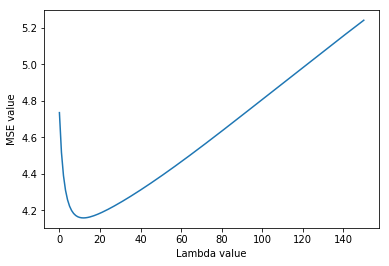

In [31]:
plt.figure()
plt.plot(df1_CV_lambdas)
plt.ylabel('MSE value')
plt.xlabel('Lambda value')
plt.show()

In [32]:
print('The best lambda value for Data Set 1 (100-10) is {}'.format(np.argmin(df1_CV_lambdas)))

The best lambda value for Data Set 1 (100-10) is 12


# Data Set 2

In [33]:
df2_CV_lambdas = run_lambdas(train_df2, 100)

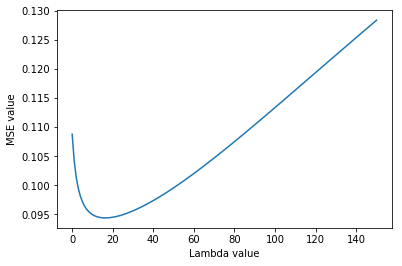

In [34]:
plt.figure()
plt.plot(df2_CV_lambdas)
plt.ylabel('MSE value')
plt.xlabel('Lambda value')
plt.show()

In [35]:
print('The best lambda value for Data Set 2 (100-100) is {}'.format(np.argmin(df2_CV_lambdas)))

The best lambda value for Data Set 2 (100-100) is 16


# Data Set 3

In [36]:
df3_CV_lambdas = run_lambdas(train_df3, 100)

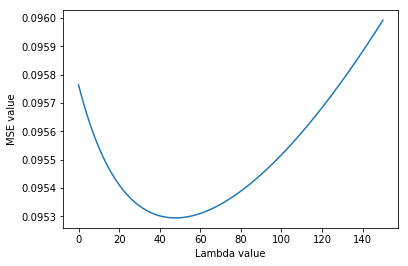

In [37]:
plt.figure()
plt.plot(df3_CV_lambdas)
plt.ylabel('MSE value')
plt.xlabel('Lambda value')
plt.show()

In [38]:
print('The best lambda value for Data Set 3 (100-100) is {}'.format(np.argmin(df3_CV_lambdas)))

The best lambda value for Data Set 3 (100-100) is 48


# Data Set 4

In [39]:
df4_CV_lambdas = run_lambdas(train_df4, 100)

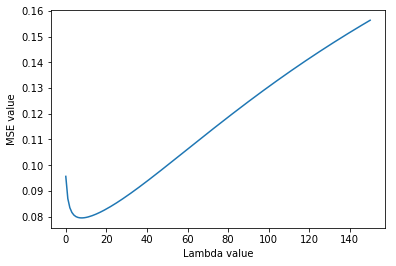

In [40]:
plt.figure()
plt.plot(df4_CV_lambdas)
plt.ylabel('MSE value')
plt.xlabel('Lambda value')
plt.show()

In [45]:
print('The best lambda value for Data Set 4 50(100-100) is {}'.format(np.argmin(df4_CV_lambdas)))

The best lambda value for Data Set 4 50(100-100) is 8


# Data Set 5

In [46]:
df5_CV_lambdas = run_lambdas(train_df5, 100)

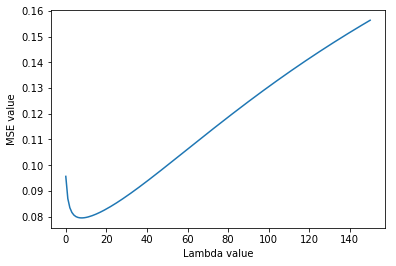

In [47]:
plt.figure()
plt.plot(df4_CV_lambdas)
plt.ylabel('MSE value')
plt.xlabel('Lambda value')
plt.show()

In [48]:
print('The best lambda value for Data Set 5 100(1000-100) is {}'.format(np.argmin(df5_CV_lambdas)))

The best lambda value for Data Set 5 100(1000-100) is 8


# Data Set 6

In [49]:
df6_CV_lambdas = run_lambdas(train_df6, 100)

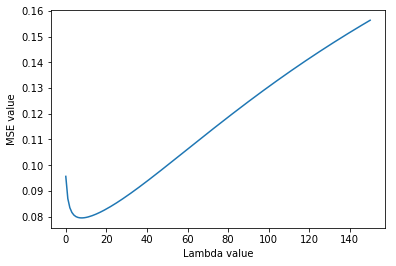

In [50]:
plt.figure()
plt.plot(df6_CV_lambdas)
plt.ylabel('MSE value')
plt.xlabel('Lambda value')
plt.show()

In [51]:
print('The best lambda value for Data Set 6 150(100-100) is {}'.format(np.argmin(df6_CV_lambdas)))

The best lambda value for Data Set 6 150(100-100) is 8
